In [1]:
import regex as re
import pandas as pd
from src.utils.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
discharge_df = pd.read_csv('data/version1.4_filtered/valid/discharge.csv.gz', compression='gzip')
target_df = pd.read_csv('data/version1.4_filtered/train/discharge_target.csv.gz', compression='gzip')
combined_df = build_combined_discharge(discharge_df, target_df)
final_df = extract_clean_sections_and_count_tokens(combined_df,section_to_next_section.keys())



Removing BHC and DI from the discharge


100%|██████████| 39447/39447 [00:04<00:00, 8195.96it/s]


Extracting features


100%|██████████| 39447/39447 [01:33<00:00, 421.40it/s]


Formating and cleaning sex section


100%|██████████| 39447/39447 [00:01<00:00, 28071.54it/s]


Counting tokens in sex section


100%|██████████| 39447/39447 [00:02<00:00, 14956.21it/s]


Formating and cleaning service section


100%|██████████| 39447/39447 [00:01<00:00, 27525.51it/s]


Counting tokens in service section


100%|██████████| 39447/39447 [00:02<00:00, 13862.71it/s]


Formating and cleaning allergies section


100%|██████████| 39447/39447 [00:01<00:00, 24971.40it/s]


Counting tokens in allergies section


100%|██████████| 39447/39447 [00:04<00:00, 8732.94it/s] 


Formating and cleaning chief_complaint section


100%|██████████| 39447/39447 [00:01<00:00, 23874.21it/s]


Counting tokens in chief_complaint section


100%|██████████| 39447/39447 [00:04<00:00, 8374.58it/s] 


Formating and cleaning major_surgical_procedures section


100%|██████████| 39447/39447 [00:03<00:00, 12772.43it/s]


Counting tokens in major_surgical_procedures section


100%|██████████| 39447/39447 [00:04<00:00, 8693.29it/s]


Formating and cleaning history_of_present_illness section


100%|██████████| 39447/39447 [00:02<00:00, 17926.98it/s]


Counting tokens in history_of_present_illness section


100%|██████████| 39447/39447 [00:50<00:00, 776.36it/s] 


Formating and cleaning past_medical_history section


100%|██████████| 39447/39447 [00:02<00:00, 14332.67it/s]


Counting tokens in past_medical_history section


100%|██████████| 39447/39447 [00:14<00:00, 2692.71it/s]


Formating and cleaning social_history section


100%|██████████| 39447/39447 [00:01<00:00, 26861.63it/s]


Counting tokens in social_history section


100%|██████████| 39447/39447 [00:03<00:00, 11975.61it/s]


Formating and cleaning family_history section


100%|██████████| 39447/39447 [00:01<00:00, 25710.05it/s]


Counting tokens in family_history section


100%|██████████| 39447/39447 [00:05<00:00, 6833.87it/s]


Formating and cleaning physical_exam section


100%|██████████| 39447/39447 [00:02<00:00, 16355.83it/s]


Counting tokens in physical_exam section


100%|██████████| 39447/39447 [00:34<00:00, 1143.97it/s]


Formating and cleaning pertinent_results section


100%|██████████| 39447/39447 [00:04<00:00, 9506.65it/s]


Counting tokens in pertinent_results section


100%|██████████| 39447/39447 [01:04<00:00, 610.15it/s]


Formating and cleaning medication_on_admission section


100%|██████████| 39447/39447 [00:01<00:00, 21017.93it/s]


Counting tokens in medication_on_admission section


100%|██████████| 39447/39447 [00:14<00:00, 2771.06it/s]


Formating and cleaning discharge_medications section


100%|██████████| 39447/39447 [00:02<00:00, 17374.76it/s]


Counting tokens in discharge_medications section


100%|██████████| 39447/39447 [00:23<00:00, 1688.37it/s]


Formating and cleaning discharge_disposition section


100%|██████████| 39447/39447 [00:01<00:00, 25001.68it/s]


Counting tokens in discharge_disposition section


100%|██████████| 39447/39447 [00:03<00:00, 10828.68it/s]


Formating and cleaning facility section


100%|██████████| 39447/39447 [00:01<00:00, 26183.77it/s]


Counting tokens in facility section


100%|██████████| 39447/39447 [00:03<00:00, 12725.54it/s]


Formating and cleaning discharge_diagnosis section


100%|██████████| 39447/39447 [00:01<00:00, 24242.30it/s]


Counting tokens in discharge_diagnosis section


100%|██████████| 39447/39447 [00:05<00:00, 6614.65it/s]


Formating and cleaning discharge_condition section


100%|██████████| 39447/39447 [00:01<00:00, 25807.79it/s]


Counting tokens in discharge_condition section


100%|██████████| 39447/39447 [00:08<00:00, 4818.43it/s]


In [4]:
final_df['brief_hospital_course_tokens'] = final_df['brief_hospital_course'].progress_apply(get_token_count)
final_df['discharge_instructions_tokens'] = final_df['discharge_instructions'].progress_apply(get_token_count)

100%|██████████| 39447/39447 [00:38<00:00, 1020.32it/s]


In [48]:
sections_to_consider_bhc = [
                'sex',
                'service',
                'allergies',
                'chief_complaint',
                'major_surgical_procedures',
                'history_of_present_illness',
                'past_medical_history',
                'social_history',
                'family_history',
                #'pertinent_results',
                'physical_exam',
                'medication_on_admission',
            ]

sections_to_consider_di = [
                'sex',
                'service',
                'chief_complaint',
                'history_of_present_illness',
                'physical_exam',
                'brief_hospital_course',
                'medication_on_admission',
                'discharge_medications',
                'discharge_disposition',
                'discharge_diagnosis',
                'discharge_condition',
            ]

In [49]:
final_df['all_sections_tokens_bhc'] = final_df[[f"{section}_tokens" for section in sections_to_consider_bhc]].sum(axis=1) + final_df['brief_hospital_course_tokens']
final_df['all_sections_tokens_di'] = final_df[[f"{section}_tokens" for section in sections_to_consider_di]].sum(axis=1) + final_df['discharge_instructions_tokens']


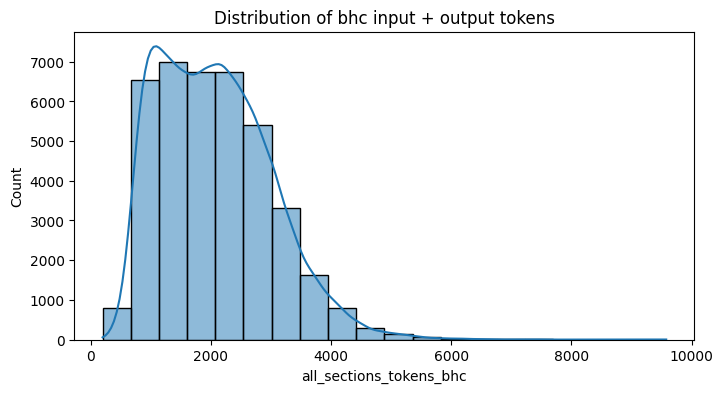

Percentage under 4000 tokens: 96.82% i.e 38192 out of 39447


In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(final_df['all_sections_tokens_bhc'], kde=True, bins=20)
plt.title(f'Distribution of bhc input + output tokens')
plt.show()

max_tok = 3980

print(f"Percentage under {max_tok + 20} tokens: {100 * (final_df['all_sections_tokens_bhc'] < max_tok).sum() / len(final_df):.2f}% i.e {len(final_df[final_df['all_sections_tokens_bhc'] < max_tok])} out of {len(final_df)}")



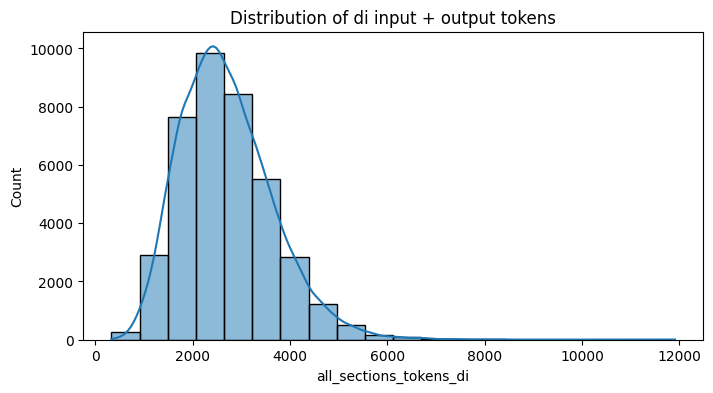

Percentage under 7970 tokens: 99.97% i.e 39437 out of 39447


In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(final_df['all_sections_tokens_di'], kde=True, bins=20)
plt.title(f'Distribution of di input + output tokens')
plt.show()

max_tok = 7950

print(f"Percentage under {max_tok + 20} tokens: {100 * (final_df['all_sections_tokens_di'] < max_tok).sum() / len(final_df):.2f}% i.e {len(final_df[final_df['all_sections_tokens_di'] < max_tok])} out of {len(final_df)}")